# 1-Programming Exercise 1: Linear Regression Coursera

## Manual Linea Regression

#  Introduction 

### The task realted to implement linear regression with one variable to predict profits for a food truck.

### This Task is related to Coursera Machine Learning Course by Andrew NG, but implemnted in Python.

**Most text used in this notebook from ex1.pdf of Coursera**

**Look at ex1.pdf to get more intuition about the task**

**The task will be implemented in three ways and three notebooks and it all about linear regression**

- As manual code which pure code.
- Using Sklearn library
- Using Tensflow & Keras

###  linear regression with one variable

In this part of this exercise,  we will implement linear regression with one variable to predict profits for a food truck.

## Most of code is written to be clean and enhancing with functions

##  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Handling file

I would like to change the data from txt to be in csv file.

**You can find these csv files at csv_files direction.**


In [2]:
def from_txt_to_csv(file_name, cols_names):
    '''
    Argument:
        file_path that you need to convert to csv file
        cols_names if you would like to saved with columns names
    return:
        True if no error occured of saved operations
    '''
# read the txt file with columns name and save as csv file
    try:
        read_file = pd.read_csv ('ex1/'+ file_name + '.txt', names=cols_names) 
        read_file.to_csv ('csv_files/' + file_name + '.csv', index=None)
# if there is any error print it in separate file in dir logs_files
    except Exception as e:
        file = open("log_files/from_txt_to_csv.log","+a")
        file.write("This error related to function from_txt_to_csv function of manual_linea_regression notebook\n" 
                   + str(e) + "\n" + "#" *99 + "\n") # "#" *99 as separated lines
    return True

In [3]:
# create columns name for our data
cols = ['city_population', 'food_truck_profit']
# call the function
from_txt_to_csv('ex1data1', cols)

True

##  Read the csv file

In [4]:
df_file = pd.read_csv('csv_files/ex1data1.csv')
df_file.head(3) # first 3 rows of our data

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


###   Plotting the Data

Before  starting  on  any  task,  it  is  often  useful  to  understand  the  data  by visualizing it. But always its complicated because number of features you have so here we just has one feature so its 2d graph.

### Graph initialize

In [5]:
def init_2d_graphs(*colors):
    '''
        Just graph initialize in good way
    '''
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True

Text(0, 0.5, 'Profit in $10,000s')

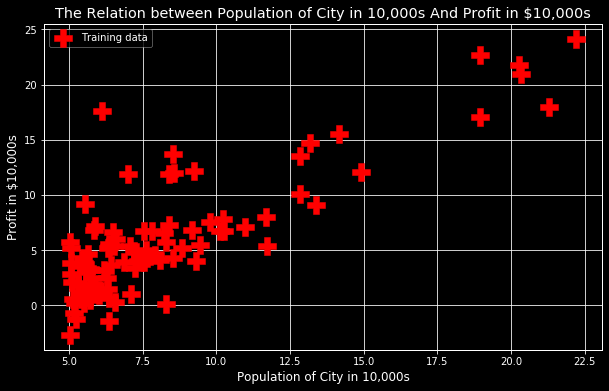

In [6]:
# our initialized and graph draw for our dataset
x = df_file['city_population'] # x_axis
y = df_file['food_truck_profit'] # y_axis

# reshape y to be (n,m) of rank-1
y = y.values.reshape(len(y),1) # because of type Series we use .values

init_2d_graphs('ggplot', 'dark_background' )

plt.scatter(x,y, s = 300, c = 'red', marker = 'P', label =  'Training data')
plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### some static of our data

In [7]:
df_file.describe()

,city_population,food_truck_profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


###  Gradient Descent

## Implementation Steps

first we have x and we need to map it to y
- x = Population of City in 10,000s
- y = Profit in $10,000s

**Hypothesis**

- second the hypothesis function is y_hat = theta0 + theta1 * X1 and we initialize X0 = 1 which have no effect on theta0:

![alt text](images/hypothesis_linear.png "hypothesis_linear_function")

- so we need to inilize these theats.

**Cost function**


- Third the cost function is use m as training example so we need to get the number of our training examples.

**Gradient Steps**

- Fourth in gradient descent there is another parameters alpha we need to initialize which the learning rate.

- Fifth and the last we need to specify the number of iteration will used to iterate and update the parameters:

![alt text](images/paramters_updated.png "paramters_updated")


## parameters initialize

In [8]:
m = len(x) 
print("Number of training example: ", m)
print("#" * 70)
Alpha = .01 # learning rate
iterations = 1500 # number of gradient descent iterations

thetas = np.zeros((2,1)) # initialize threats as 2d array and 2*1 dimension with 0 values
print('Theats shape is: ', thetas.shape)
print("#" * 70)
print('Theats values are: ', thetas)
print("#" * 70)

# add columns of 1 which is x0 
X = np.stack((x, np.ones(m)), axis=1) # create x0 = 1 for each example
print("Now X shape is: ", X.shape)

Number of training example:  97
######################################################################
Theats shape is:  (2, 1)
######################################################################
Theats values are:  [[0.]
 [0.]]
######################################################################
Now X shape is:  (97, 2)


##  Cost Function


**theta is 2 * 1 and X is 97 * 2 so we can multiply X*theta and get 97 * 1**

In [9]:
def cost_function(thetas,x,m,y):
    '''
    Arguments:
        thetas the paramter we need to minimize of shape 2*1
        x the features of our dataset 97*2
        m number of training examples
        y is output we need to predict
    return:
        cost function as total squared cost of our predicted values h_x and the real values y
    '''
# y_hat = theta0 * x0 + theta1 * x1 and with vectorized will be x = 97*2 * theta =  2*1
    y_hat = np.matmul(x,thetas) # hypothesis function

# get the cost function
    cost_function = (1/(2*m)) * np.sum(np.square(y_hat - y))
    return cost_function

In [10]:
J = cost_function(thetas, X, m, y)
print("The cost funtion of our training data is: ", J)

The cost funtion of our training data is:  32.072733877455676


## 1.8 Gradient descent

Next, we will implement gradient descent.

### Remember the  Gradient descent is:

![alt text](images/paramters_updated.png "paramters_updated")

**NOTE !!**

Its usful to undrstand that graident descent work as optimization Algorithm that for each number of iteration looks at you cost function and for each iteration trying to minimize it by set the thetas paramters that help fitting the best line to the data.

In [11]:
def gradient_descent(thetas,x,m,y, learning_rate):
    '''
    Arguments:
        thetas the paramter we need to minimize of shape 2*1
        x the eatures of our dataset 97*2
        m number of training examples
        y is output we need to predict
        learning rate is alpha which inilized above as .01
    return:
        cost function as total squared cost of our predicted values h_x and the real values y
    '''
# y_hat = theta0 * x0 + theta1 * x1 and with vectorized will be x = 97*2 * theta =  2*1
    y_hat = np.matmul(x,thetas)

# y_hat = 97*1 - y = 97*1 will be 97*1 and multiply by x which 97*2 so need to transpose to be 1*97 and x 97*2
    cost = np.matmul(np.transpose(y_hat-y), x)
    grad =((learning_rate/m) * cost)
    
# return the gradient but transposed to be 2*1 instead of 1*2 to that maps to theta dimensions
    return grad.T

In [12]:
grad = gradient_descent(thetas, X, m, y, Alpha)
print("instead of Thetas as zero now thetas paramters after just 1 iteration is: ", grad)

instead of Thetas as zero now thetas paramters after just 1 iteration is:  [[-0.6532885 ]
 [-0.05839135]]


In [13]:
def linear_regression_model(thetas, x, m, y, learning_rate, num_of_iterations):
    '''
    Arguments:
        thetas the paramter we need to minimize of shape 2*1
        x the eatures of our dataset 97*2
        m number of training examples
        y is output we need to predict
        learning rate is alpha which inilized above as .01
        num_of_iterations you need to minimize the cost function
    return:
        cost function as total squared cost of our predicted values h_x and the real values y
    '''
    costs = []
    all_theta = []
    for i in range(num_of_iterations):
        J = cost_function(thetas, x, m, y)
        all_theta.append(thetas)
        costs.append(J)
# get new values of theta as gradient descent step
        grad = gradient_descent(thetas, x, m , y, learning_rate)

# update theta so if grad is negative the theta will increase otherwise will decrease
        thetas = thetas - grad

    return costs, thetas, all_theta

In [14]:
all_cost, last_thetas, all_theta = linear_regression_model(thetas, X, m, y, Alpha, iterations)

In [15]:
J = cost_function(last_thetas, X, m, y)
print("Our cost function after 1500 iterations is: ", J)

Our cost function after 1500 iterations is:  4.483388256587725


In [16]:
predict1 = np.abs(np.matmul([1, 3.5],last_thetas))
predict2 = np.abs(np.matmul([1, 7],last_thetas))
print("Our Prediction 1", predict1)
print("Second Prediction", predict2)

Our Prediction 1 [11.53965769]
Second Prediction [24.24567773]


## Graphs of different fitting line at different values of parameters

Text(0, 0.5, 'Profit in $10,000s')

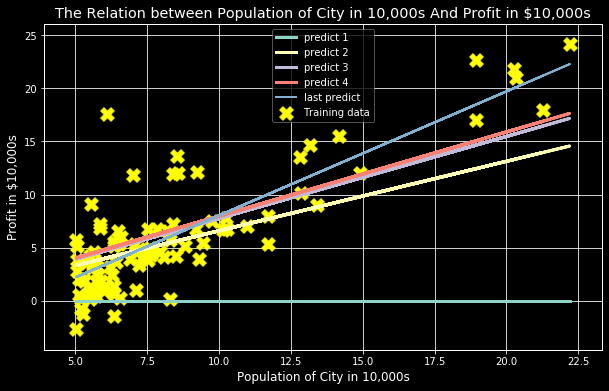

In [17]:
# Plot the graph with first 4 values of thetas and last values of thetas

init_2d_graphs('ggplot', 'dark_background' ) # initialize graphics size
for i in range(4):
    y_hat = np.matmul(X, all_theta[i])
    plt.plot(x, y_hat, label='predict ' + str(i+1), linewidth=3)
y_hat = np.matmul(X, last_thetas)
plt.plot(x, y_hat, label= 'last predict',linewidth=2)
plt.scatter(x,y, s = 200, c = 'yellow', marker = 'X', label =  'Training data')
plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')


## Cost function graph

after we see how the fitting line on our data its usful to see how cost function decreased with differnt steps of gradient descent.

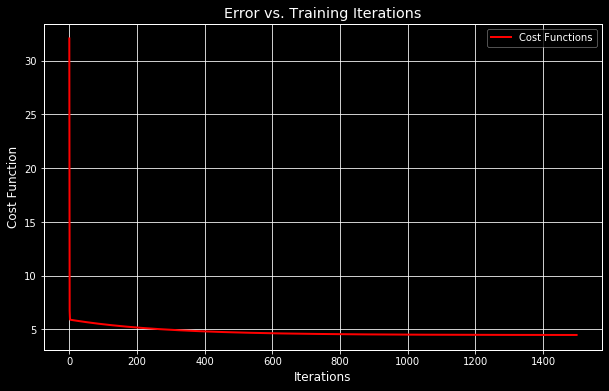

In [18]:
init_2d_graphs() # initialize graphics size
plt.plot(np.arange(iterations), all_cost, 'r', label='Cost Functions', linewidth=2) 
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title('Error vs. Training Iterations')
plt.legend()

### Note
**as you can see in graph above its will be fine to stop after 400 or 600 iterations because it has a small decrease**

# Now it's time for multiple variables of Linear Regression

In this part, we will implement linear regression with multiple variables to predict  the  prices  of  houses.

**The same process done as above but because of its now has more than one features so ignore some graphs because of 3d dimension**

## Handling file

**As step above**

In [19]:
# create columns name for our data
cols = ['house_size', 'number_of_bedrooms', 'house_price']
# call the function
from_txt_to_csv('ex1data2', cols)
df_file = pd.read_csv('csv_files/ex1data2.csv')
#now you can see the data after convert to csv with columns name
df_file.head()

,house_size,number_of_bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
df_file.describe()

,house_size,number_of_bedrooms,house_price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## features normalization or Data Scaling

**Its important step to make the values of different features within spceific range because it help you in:**

- Avoid NAN values because numbers in operations of multiplication
- its help the machine to deal with numbers within range than different ranges and the operations be less cost

**try to comment the line of calling function features_normalization_with_std and see result of how its affect.**

![alt text](images/nan.png "Nan Value")


**Two function implemented for feature scaling choose any of them**

In [21]:
def features_normalization_with_std(X):
    '''
        Normalize the data via standard deviation
    '''
    X= (X - np.mean(X)) / np.std(X)
    return X

In [22]:
def features_normalization_with_min_max(X):
    '''
        Normalize the data via min max approach
    '''
    X = (X - np.mean(X)) / (np.max(X) - np.min(X))
    return X

In [23]:
df_file = features_normalization_with_std(df_file)

In [24]:
x = np.array(df_file.iloc[:, :2])# get the 2 features columns)
y = df_file['house_price'] # the real output 

# # because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
y = y.values.reshape(len(y),1) # because of type Series we use .values

# variables and parameters initialize
all_cost = []
m = len(y) 
print(x.shape)
print("#"*80)
print("Number of training example: ", m)
print("#"*80)
Alpha = .1 # learning rate
iterations = 100 # number of gradient descent iterations
thetas = np.zeros((3,1)) # initialize threats as 2d array and 2*1 dimension with 0 values
print('Theats shape is: ', thetas.shape)
print("#"*80)
print('Theats values are: ', thetas)
print("#"*80)
X = np.column_stack((x,np.ones(len(y))))
print("Now X shape is: ", X.shape)

(47, 2)
################################################################################
Number of training example:  47
################################################################################
Theats shape is:  (3, 1)
################################################################################
Theats values are:  [[0.]
 [0.]
 [0.]]
################################################################################
Now X shape is:  (47, 3)


In [25]:
print("Now the first 5 rows of x values are: ", X[:5, :])

Now the first 5 rows of x values are:  [[ 0.13141542 -0.22609337  1.        ]
 [-0.5096407  -0.22609337  1.        ]
 [ 0.5079087  -0.22609337  1.        ]
 [-0.74367706 -1.5543919   1.        ]
 [ 1.27107075  1.10220517  1.        ]]


## call the Cost Function

In [26]:
J = cost_function(thetas, X, m, y)
print("The cost funtion after data scaling is: ", J)

The cost funtion after data scaling is:  0.5000000000000001


## 2.4 call the gradient descent

In [27]:
grad = gradient_descent(thetas, X, m, y, Alpha)
print("instead of Thetas as zero now thetas paramters after just 1 iteration is: ", grad)

instead of Thetas as zero now thetas paramters after just 1 iteration is:  [[-8.54987593e-02]
 [-4.42261117e-02]
 [ 1.03935773e-17]]


##  call the linear_regression_model for multiple of iterations

In [28]:
all_cost, last_thetas, all_theta = linear_regression_model(grad, X, m, y, Alpha, iterations)

In [29]:
J = cost_function(last_thetas, X, m, y)
print("Our cost function after 1000 iterations without feature scaling: ", J)

Our cost function after 1000 iterations without feature scaling:  0.13354050657470815


## 2.5 Cost function graph

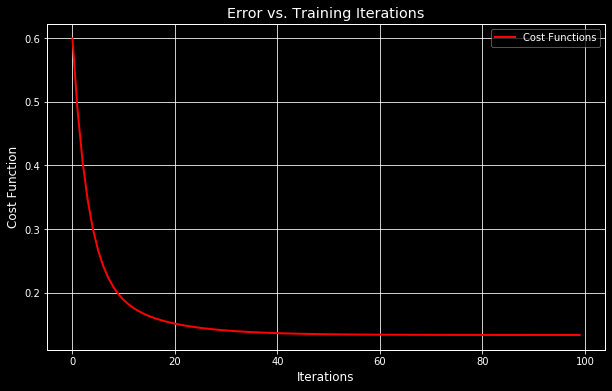

In [30]:
init_2d_graphs() # initialize graphics size
#np.arange(iters) means from 0 to 1500 iterations
plt.plot(np.arange(iterations), all_cost, 'r', label='Cost Functions', linewidth=2) 
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title('Error vs. Training Iterations')
plt.legend()

## Another with features_normalization_with_min_max

In [31]:
# create columns name for our data
cols = ['house_size', 'number_of_bedrooms', 'house_price']
# call the function
from_txt_to_csv('ex1data2', cols)
df_file = pd.read_csv('csv_files/ex1data2.csv')
#now you can see the data after convert to csv with columns name
df_file.head()

,house_size,number_of_bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [32]:
df_file = features_normalization_with_min_max(df_file)

In [33]:
x = np.array(df_file.iloc[:, :2])# get the 2 features columns)
y = df_file['house_price'] # the real output 

# # because y is shape (97,) whcih rank of 0 and we need to be (97,1) to subtract from y_hat
y = y.values.reshape(len(y),1) # because of type Series we use .values

# variables and parameters initialize
all_cost = []
m = len(y) 
print(x.shape)
print("#"*80)
print("Number of training example: ", m)
print("#"*80)
Alpha = .1 # learning rate
iterations = 100 # number of gradient descent iterations
thetas = np.zeros((3,1)) # initialize threats as 2d array and 2*1 dimension with 0 values
print('Theats shape is: ', thetas.shape)
print("#"*80)
print('Theats values are: ', thetas)
print("#"*80)
X = np.column_stack((x,np.ones(len(y))))
print("Now X shape is: ", X.shape)

(47, 2)
################################################################################
Number of training example:  47
################################################################################
Theats shape is:  (3, 1)
################################################################################
Theats values are:  [[0.]
 [0.]
 [0.]]
################################################################################
Now X shape is:  (47, 3)


In [34]:
J = cost_function(thetas, X, m, y)
print("The cost funtion after data scaling is: ", J)

The cost funtion after data scaling is:  0.027238016045482722


In [35]:
grad = gradient_descent(thetas, X, m, y, Alpha)
print("instead of Thetas as zero now thetas paramters after just 1 iteration is: ", grad)

instead of Thetas as zero now thetas paramters after just 1 iteration is:  [[-4.32682402e-03]
 [-1.94278977e-03]
 [ 2.59839431e-18]]


In [36]:
all_cost, last_thetas, all_theta = linear_regression_model(grad, X, m, y, Alpha, iterations)

In [37]:
J = cost_function(last_thetas, X, m, y)
print("Our cost function after 1000 iterations without feature scaling: ", J)

Our cost function after 1000 iterations without feature scaling:  0.014319974217628637


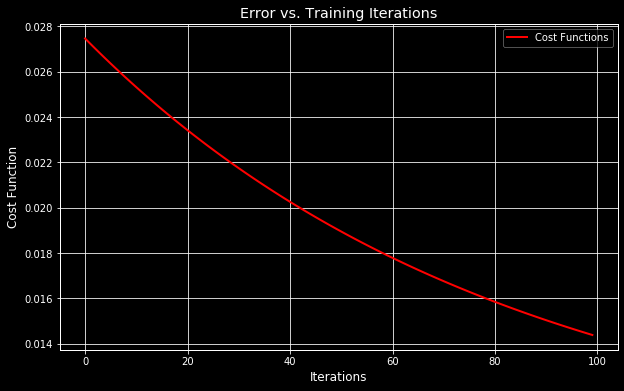

In [38]:
init_2d_graphs() # initialize graphics size
#np.arange(iters) means from 0 to 1500 iterations
plt.plot(np.arange(iterations), all_cost, 'r', label='Cost Functions', linewidth=2) 
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title('Error vs. Training Iterations')
plt.legend()